# Name: Vatsal Vinay Parikh

# Multi-class Classification: Data Science in Hospitality Management
## Problem Statement:

You are provided with a comprehensive dataset from a hotel booking system. The dataset includes various features such as the number of adults and children, duration of stay (split between weekend and weeknights), meal plan preference, requirement for parking space, lead time, arrival dates (year, month, date), market segment, guest history (repeated guest, number of previous cancellations, and number of previous bookings not canceled), average price per room, number of special requests, and booking status. The objective is to develop a predictive model that can accurately forecast the type of room a guest is likely to reserve (room_type_reserved). Successfully predicting the room_type_reserved will empower hotels to optimize room inventory management, tailor marketing strategies, enhance guest experiences through personalized services, improve revenue management through dynamic pricing, and boost operational efficiency by anticipating demand for various room types.

## Aim:
* To perform multi-class classification on room types that customer will likely to reserve

## Dataset Attributes
The dataset provided from a hotel booking system and contains various features that describe the booking details and customer preferences. Here is a brief overview of the dataset columns:
* no_of_adults: The number of adults included in the booking.
* no_of_children: The number of children included in the booking.
* no_of_weekend_nights: The number of weekend nights booked.
* no_of_week_nights: The number of weeknights booked.
* type_of_meal_plan: The type of meal plan selected by the guest.
* required_car_parking_space: Indicates whether the guest required a car parking space.
* room_type_reserved: The type of room reserved by the guest.
* lead_time: The number of days between the booking date and the arrival date.
* arrival_year: The year of arrival.
* arrival_month: The month of arrival.
* arrival_date: The date of arrival.
* market_segment_type: The market segment from which the booking originated.
* repeated_guest: Indicates whether the guest has previously stayed at the hotel.
* no_of_previous_cancellations: The number of previous bookings that were canceled by the guest.
* no_of_previous_bookings_not_canceled: The number of previous bookings not canceled by the guest.
* avg_price_per_room: The average price per room for the booking.
* no_of_special_requests: The number of special requests made by the guest.
* booking_status: Indicates whether the booking was canceled or not.

# Load dataset

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score

In [2]:
# Loading data

data = pd.read_csv("train.csv")
data.head(5)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1,0,2,1,Meal Plan 1,0,Room_Type 1,116,2018,2,28,Offline,0,0,0,61.0,0,Canceled
1,2,0,0,1,Meal Plan 1,0,Room_Type 1,15,2018,12,27,Offline,0,0,0,65.0,0,Not_Canceled
2,1,0,2,2,Meal Plan 1,0,Room_Type 5,44,2018,5,27,Corporate,0,0,0,135.4,0,Canceled
3,2,0,1,3,Meal Plan 1,0,Room_Type 1,250,2018,9,26,Online,0,0,0,95.0,0,Canceled
4,3,0,2,3,Meal Plan 1,0,Room_Type 4,48,2018,7,2,Online,0,0,0,157.5,0,Canceled


## Data Analysis
Summarize the data. How much data is present? What attributes/features are continuous valued? Which attributes are categorical?

Display the statistical values for each of the attributes, of the distributions for each attribute. Explain noticeable traits for key attributes. Are there any attributes that might require special treatment? If so, what special treatment might they require?

Analyze and discuss the relationships between the data attributes, and between the data attributes and label.

Analyze the relationship between all the features. Use appropriate visualization techniques.

**Summarize the data.**
- How much data is present?
- What attributes/features are continuous valued?
- Which attributes are categorical?

In [3]:
# How much data is present?
rows, cols = data.shape
print("Number of rows: ", rows, end=" ")
print("\nNumber of columns: ", cols)

Number of rows:  32641 
Number of columns:  18


In [4]:
# Getting the concise summary about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32641 entries, 0 to 32640
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          32641 non-null  int64  
 1   no_of_children                        32641 non-null  int64  
 2   no_of_weekend_nights                  32641 non-null  int64  
 3   no_of_week_nights                     32641 non-null  int64  
 4   type_of_meal_plan                     32641 non-null  object 
 5   required_car_parking_space            32641 non-null  int64  
 6   room_type_reserved                    32641 non-null  object 
 7   lead_time                             32641 non-null  int64  
 8   arrival_year                          32641 non-null  int64  
 9   arrival_month                         32641 non-null  int64  
 10  arrival_date                          32641 non-null  int64  
 11  market_segment_

In [5]:
# Checking what attributes/features are continuous-valued
data.select_dtypes(include=['float64', 'int64']).dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
required_car_parking_space                int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
dtype: object

In [6]:
# Checking what attributes are categorical
data.select_dtypes(include=['object']).dtypes

type_of_meal_plan      object
room_type_reserved     object
market_segment_type    object
booking_status         object
dtype: object

- **Display the statistical values for each of the attributes, of the distributions for each attribute.**

In [7]:
# Describing the statistical values for each attributes
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,32641.0,1.846941,0.517504,0.0,2.0,2.00,2.00,4.0
no_of_children,32641.0,0.105205,0.400701,0.0,0.0,0.00,0.00,10.0
no_of_weekend_nights,32641.0,0.810913,0.870699,0.0,0.0,1.00,2.00,7.0
no_of_week_nights,32641.0,2.204528,1.408902,0.0,1.0,2.00,3.00,17.0
required_car_parking_space,32641.0,0.031065,0.173497,0.0,0.0,0.00,0.00,1.0
lead_time,32641.0,85.212830,85.837873,0.0,17.0,57.00,126.00,443.0
arrival_year,32641.0,2017.819858,0.384311,2017.0,2018.0,2018.00,2018.00,2018.0
arrival_month,32641.0,7.429245,3.067804,1.0,5.0,8.00,10.00,12.0
arrival_date,32641.0,15.623909,8.740196,1.0,8.0,16.00,23.00,31.0
repeated_guest,32641.0,0.025214,0.156776,0.0,0.0,0.00,0.00,1.0


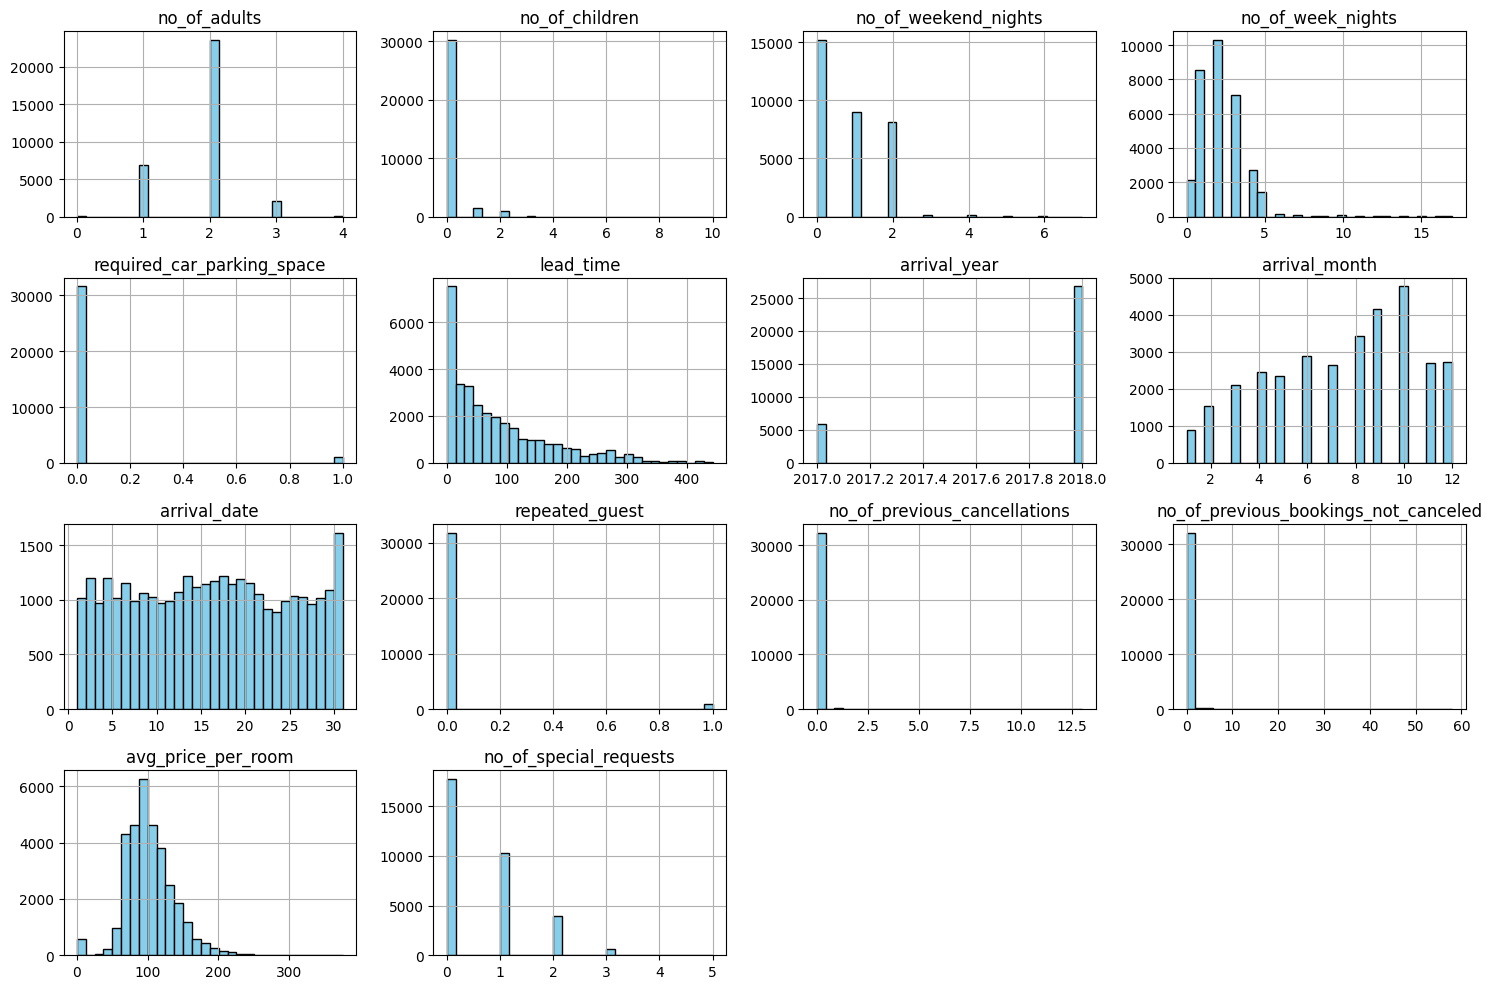

In [8]:
# Plotting histogram for numerical attributes
data.hist(figsize=(15, 10),  bins=30, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

- From the histograms above, it can be inferred that required_car_parking_space and repeated_guest are binary categorical variables.
- The only variable that appears to be normally distributed is the avg_price_per_room.
- Most of the variables are not continuous attributes but are integers that lie in a specific range.

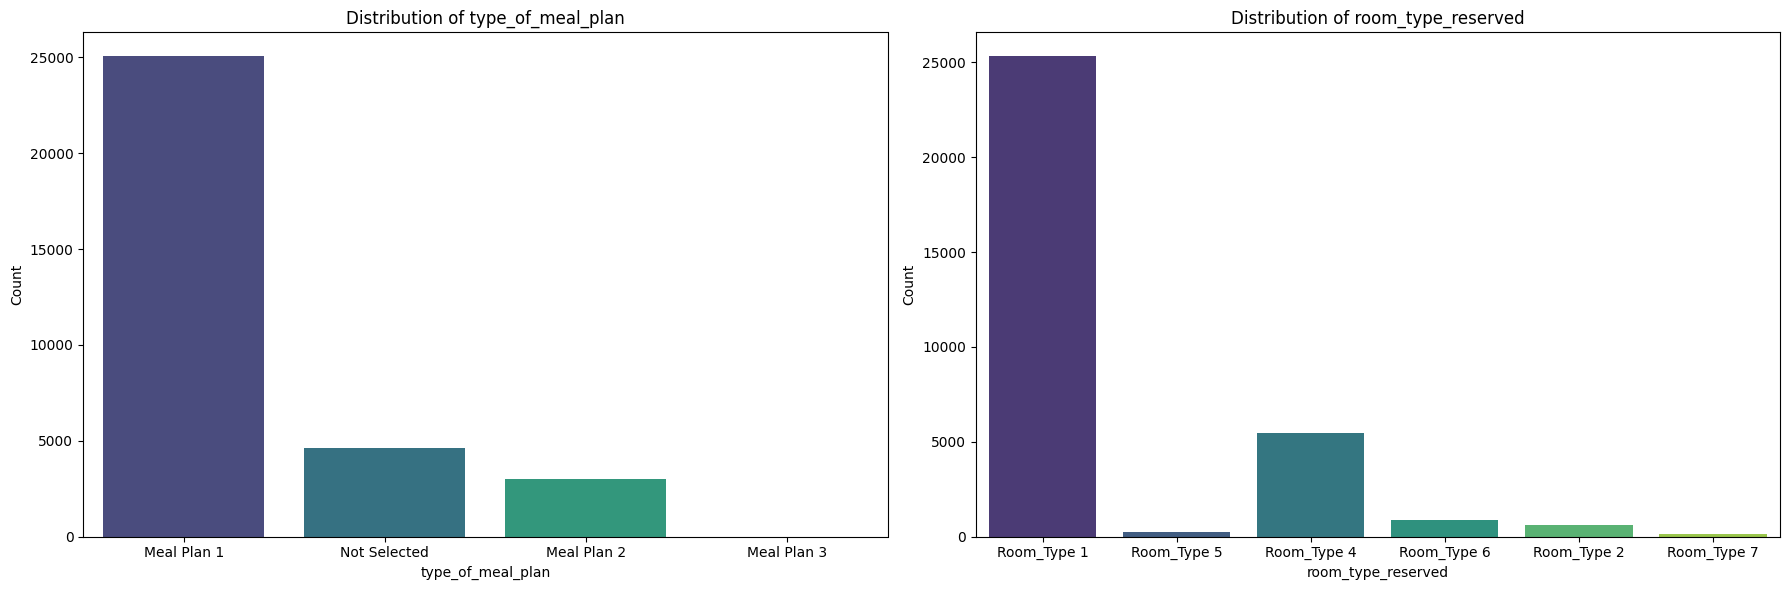

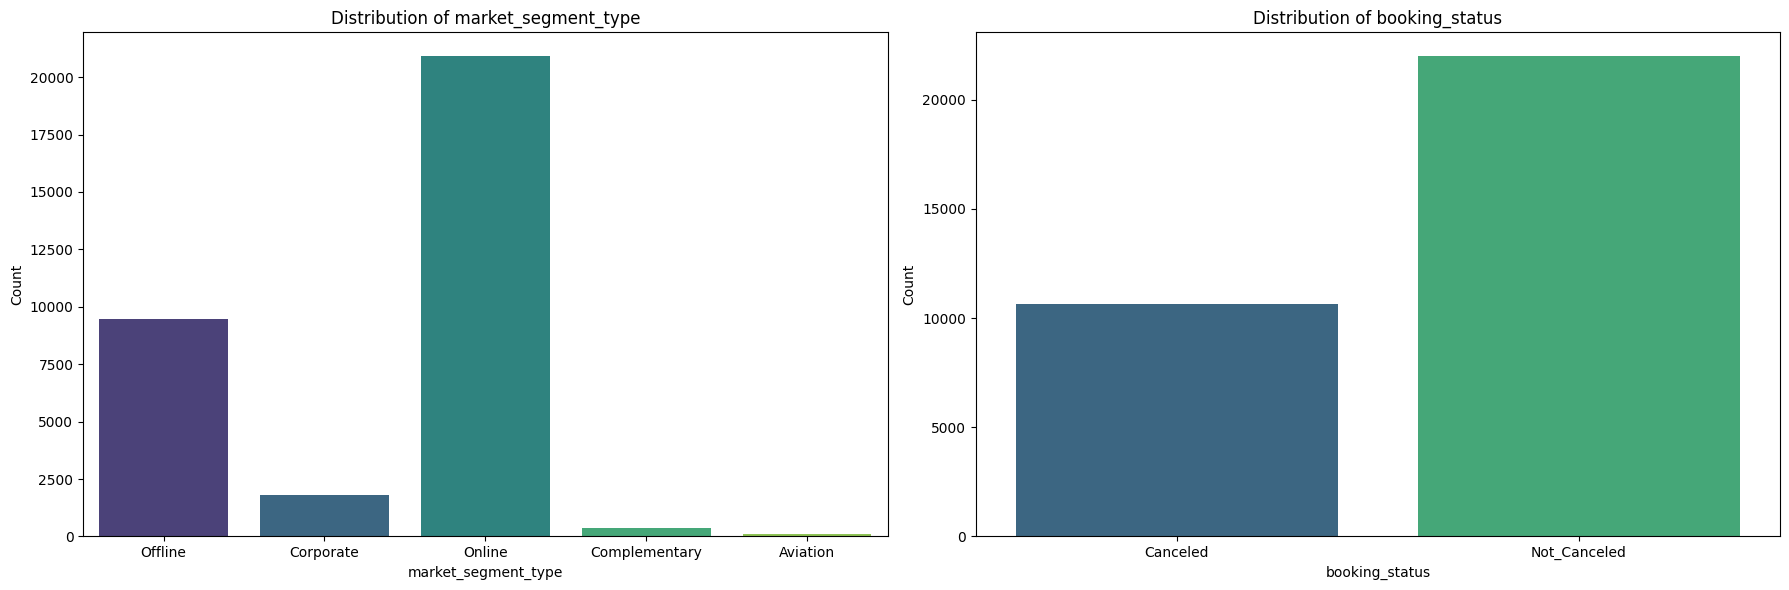

In [9]:
categorical_attributes = data.select_dtypes(include='object').columns

for i in range(0, len(categorical_attributes), 2):
    num_plots = min(2, len(categorical_attributes) - i)
    fig, axes = plt.subplots(1, num_plots, figsize=(18, 6))
    for j, column in enumerate(categorical_attributes[i:i+num_plots]):
        sns.countplot(data=data, x=column, hue=column, palette='viridis', ax=axes[j])
        axes[j].set_title(f'Distribution of {column}')
        axes[j].set_xlabel(column)
        axes[j].set_ylabel('Count')
    plt.tight_layout()
    plt.show()


- The above figures are countplots that represent the distribution of categorical attributes present in the data.


- **Explain noticeable traits for key attributes. Are there any attributes that might require
special treatment? If so, what special treatment might they require?**

- We plot the distribution of the target feature - Room Types and analyse that there are 6 different types of room categories.
- Out of the 6 rooms, the Room_Type1 is the most frequent room type with almost 25000 values.
- Overall, the target feature is quite imbalanced.

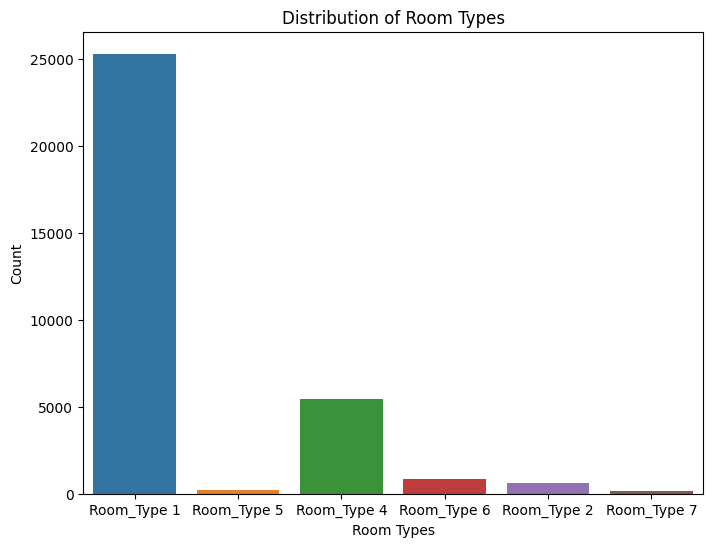

In [10]:
# Plotting distribution of target feature - Room Types
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='room_type_reserved', hue = 'room_type_reserved', legend = False)
plt.title('Distribution of Room Types')
plt.xlabel('Room Types')
plt.ylabel('Count')
plt.show()

In [11]:
# Convert required_car_parking_space and repeated_guest to categorical
data['required_car_parking_space'] = data['required_car_parking_space'].map({0: 'No', 1: 'Yes'})
data['repeated_guest'] = data['repeated_guest'].map({0: 'No', 1: 'Yes'})

Based on the above distributions the two features required_car_parking_space and repeated_guest require a special treatment of converting them from numeric to categorical due to their binary nature.

- **Analyze and discuss the relationships between the data attributes, and between the data attributes and label.**

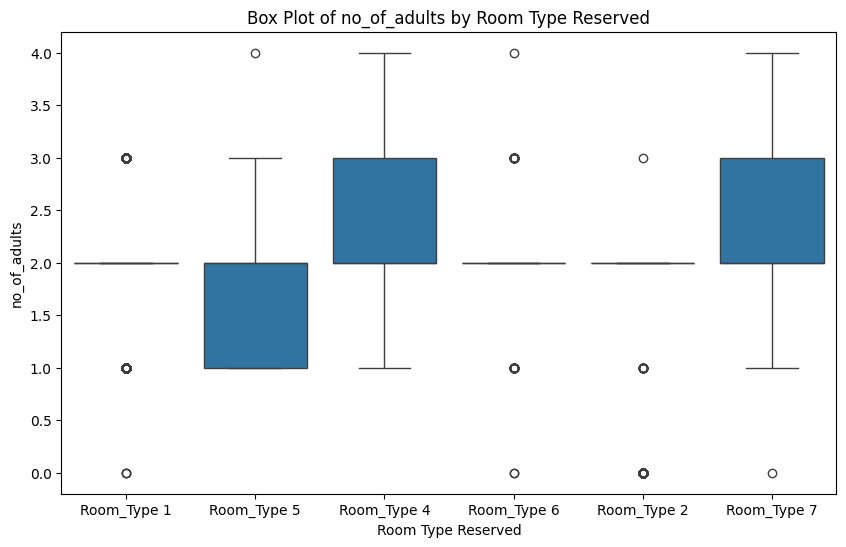

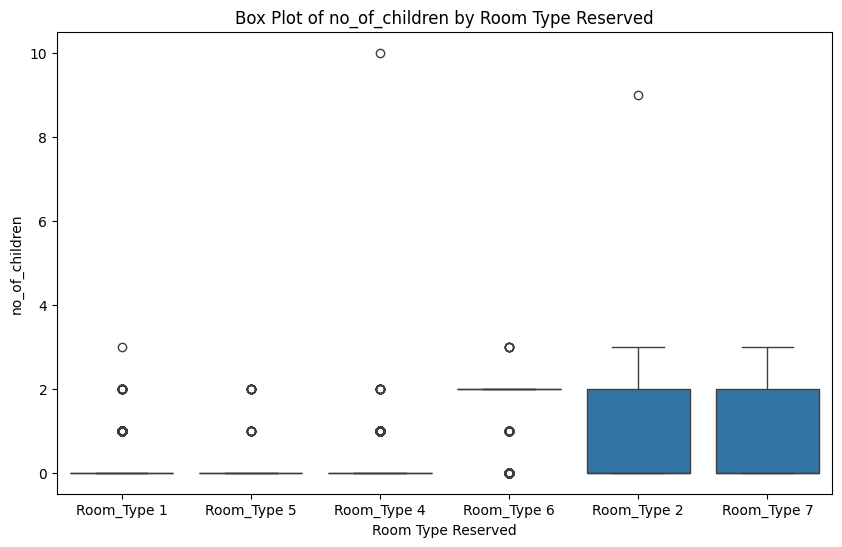

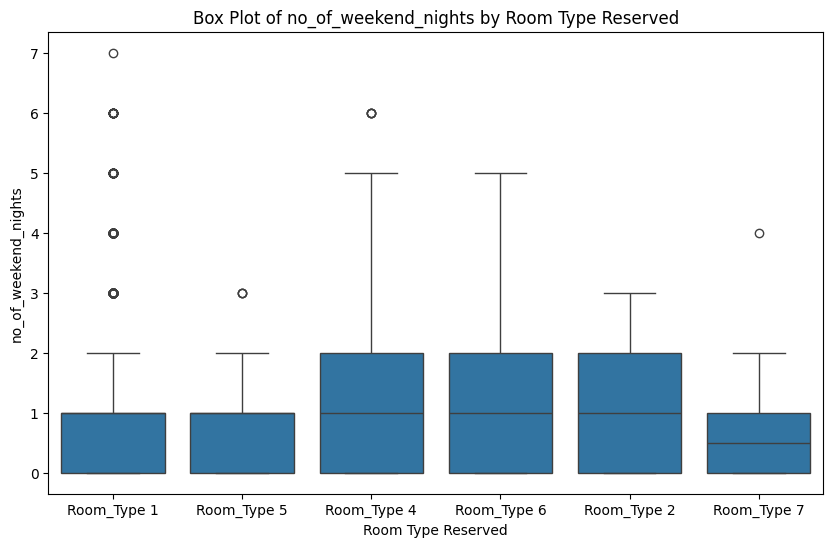

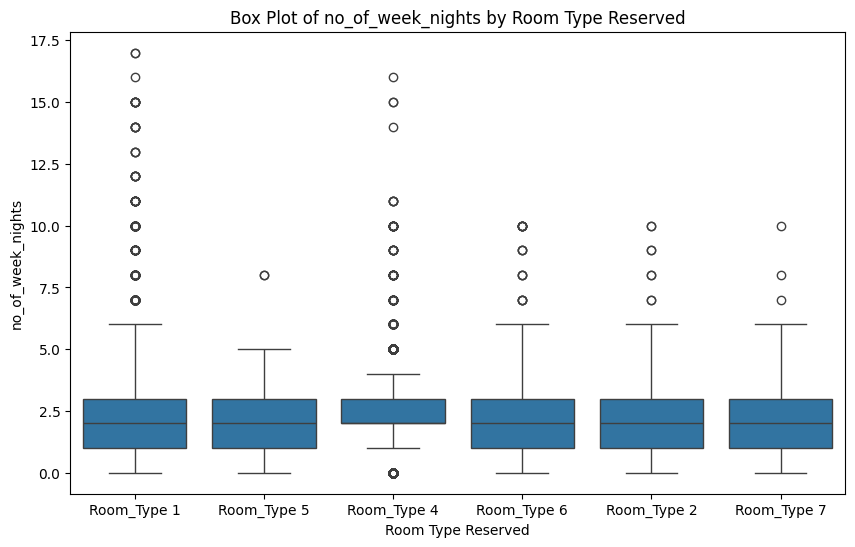

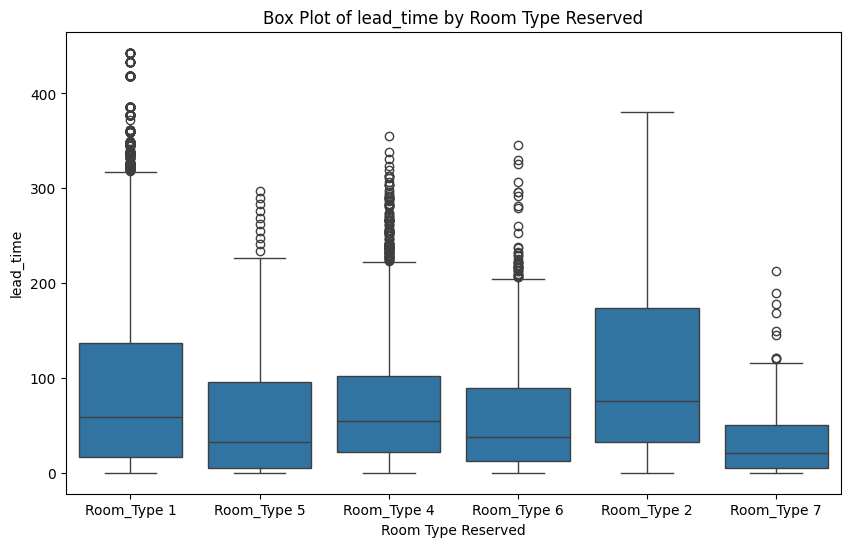

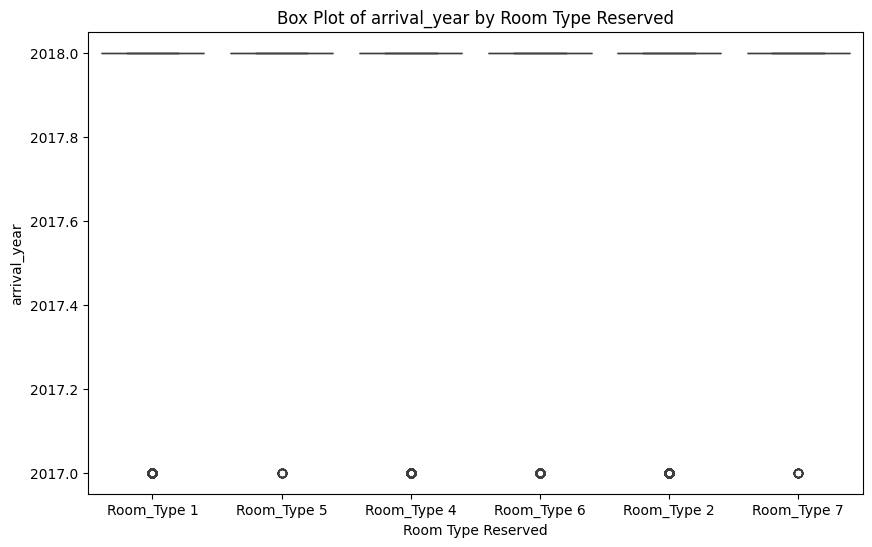

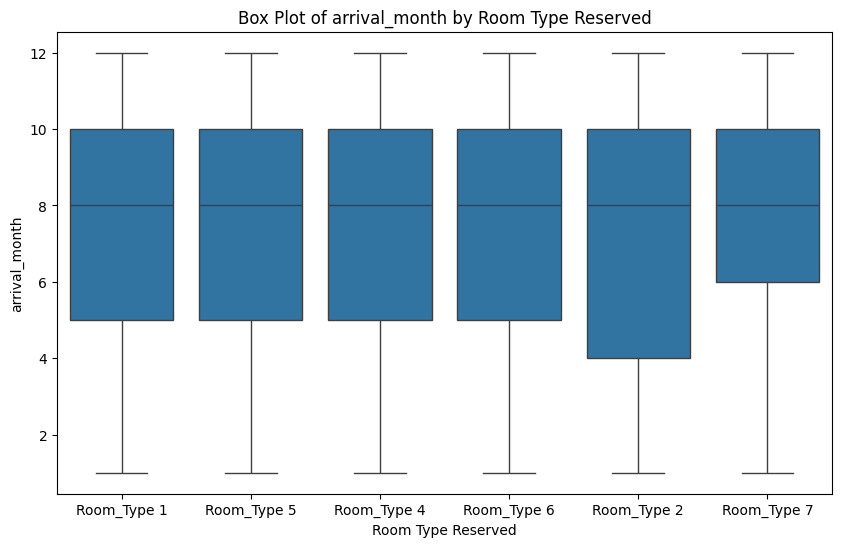

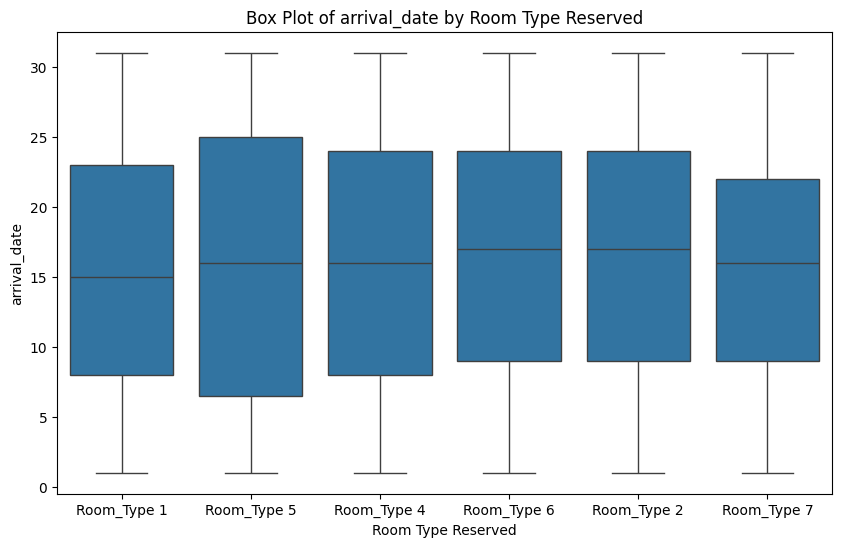

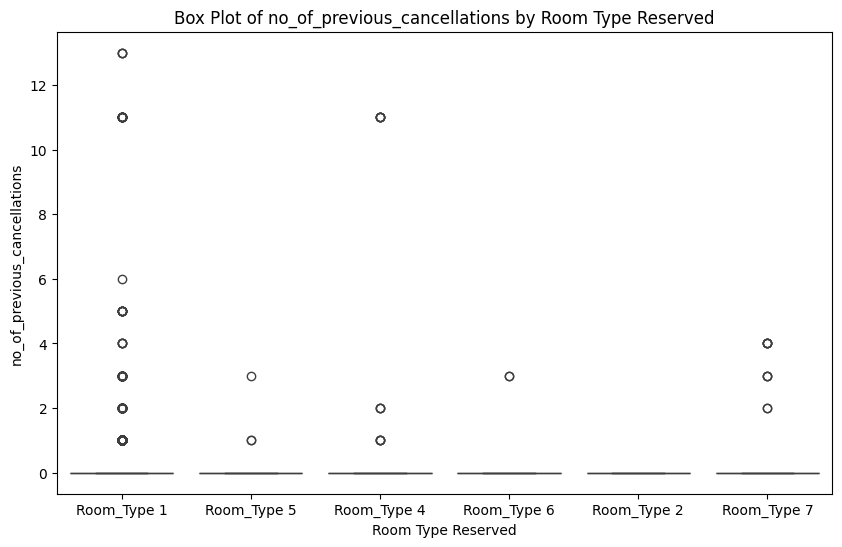

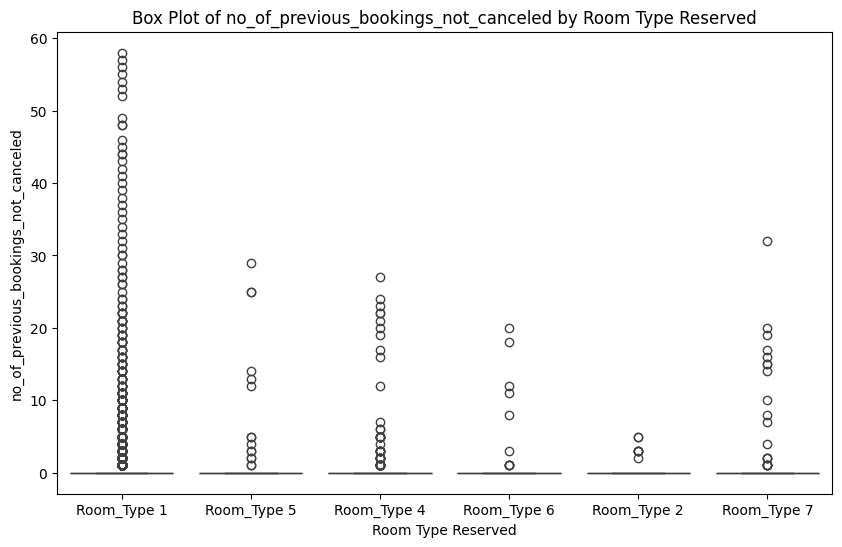

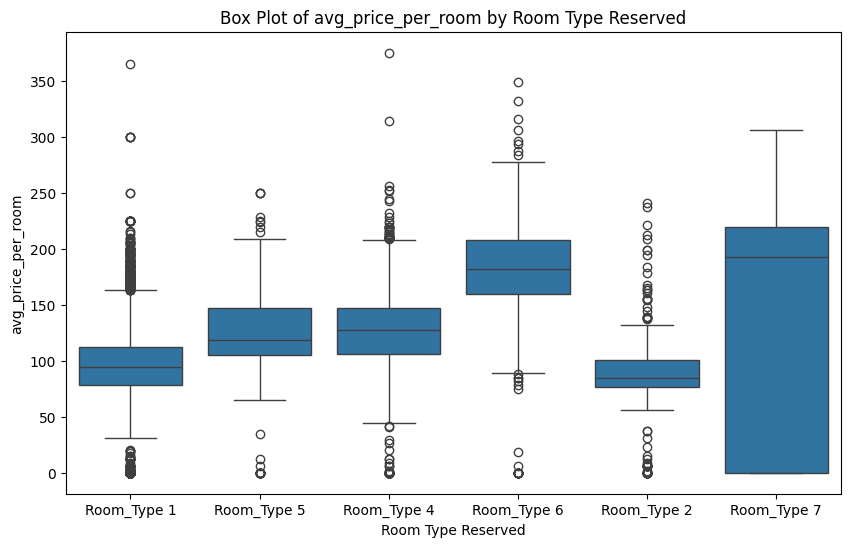

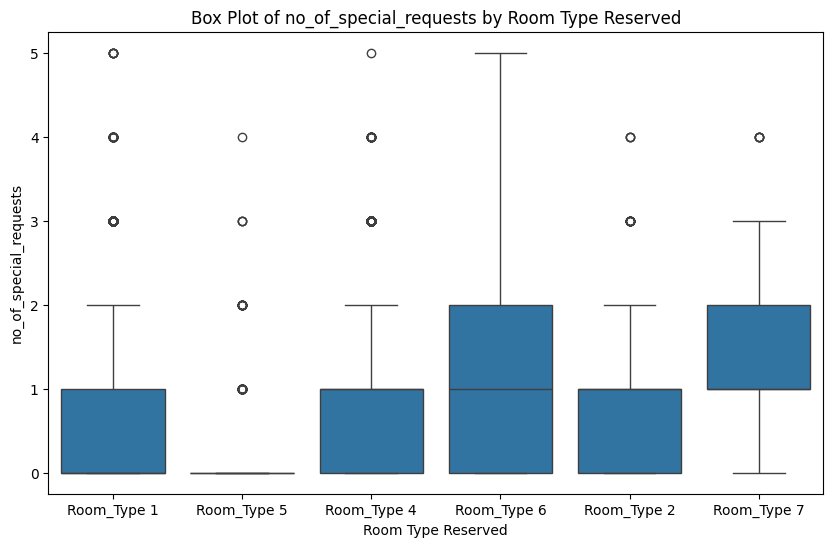

In [12]:
numerical_attributes = data.select_dtypes(include=['int64', 'float64'])

for attribute in numerical_attributes:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x='room_type_reserved', y=attribute)
    plt.title(f'Box Plot of {attribute} by Room Type Reserved')
    plt.xlabel('Room Type Reserved')
    plt.ylabel(attribute)
    plt.show()

- From the box plots above, we can infer that lead_time, avg_price_per_room has significant amount of outliers, whereas the columns arrival_month, arrival_date, no_of_weekend_nights, and no_of_week_nights are more normally distributed.

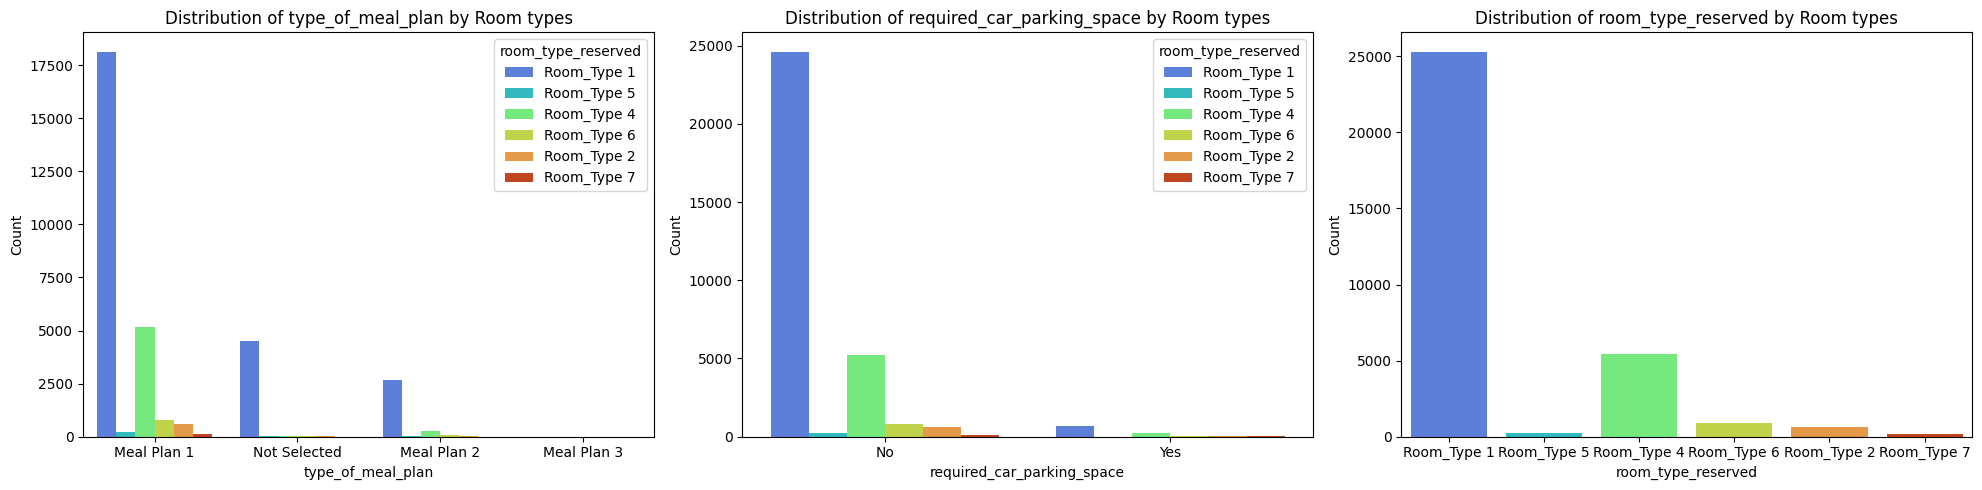

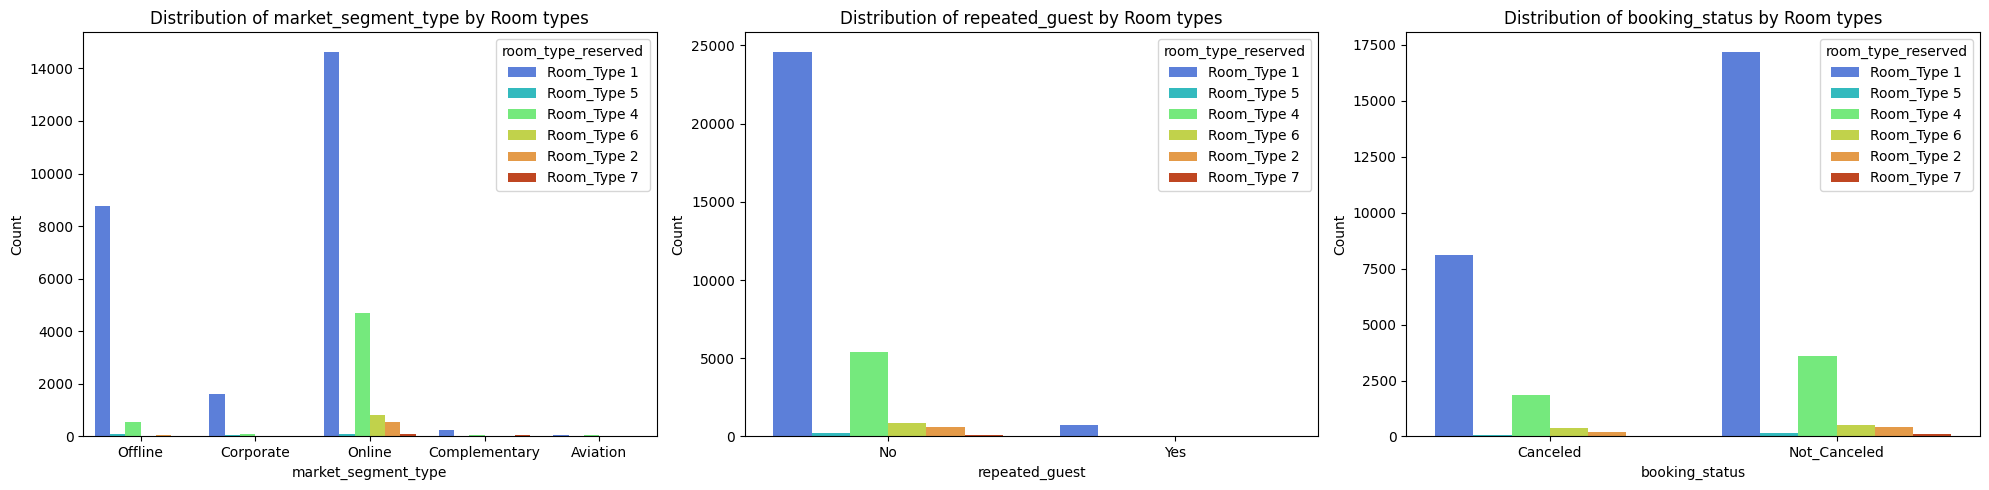

In [13]:
categorical_attributes = data.select_dtypes(include='object').columns

# Analyze relationships between categorical attributes and churn label
for i in range(0, len(categorical_attributes), 3):
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    for j, column in enumerate(categorical_attributes[i:i+3]):
        sns.countplot(data=data, x=column, hue='room_type_reserved', palette='turbo', ax=axes[j])
        axes[j].set_title(f'Distribution of {column} by Room types')
        axes[j].set_xlabel(column)
        axes[j].set_ylabel('Count')
    plt.tight_layout()
    plt.show()

- The above countplot distribution provides a comprehensive analysis of how categorical attributes are distributed with respect to the label 'room_type_reserved'.

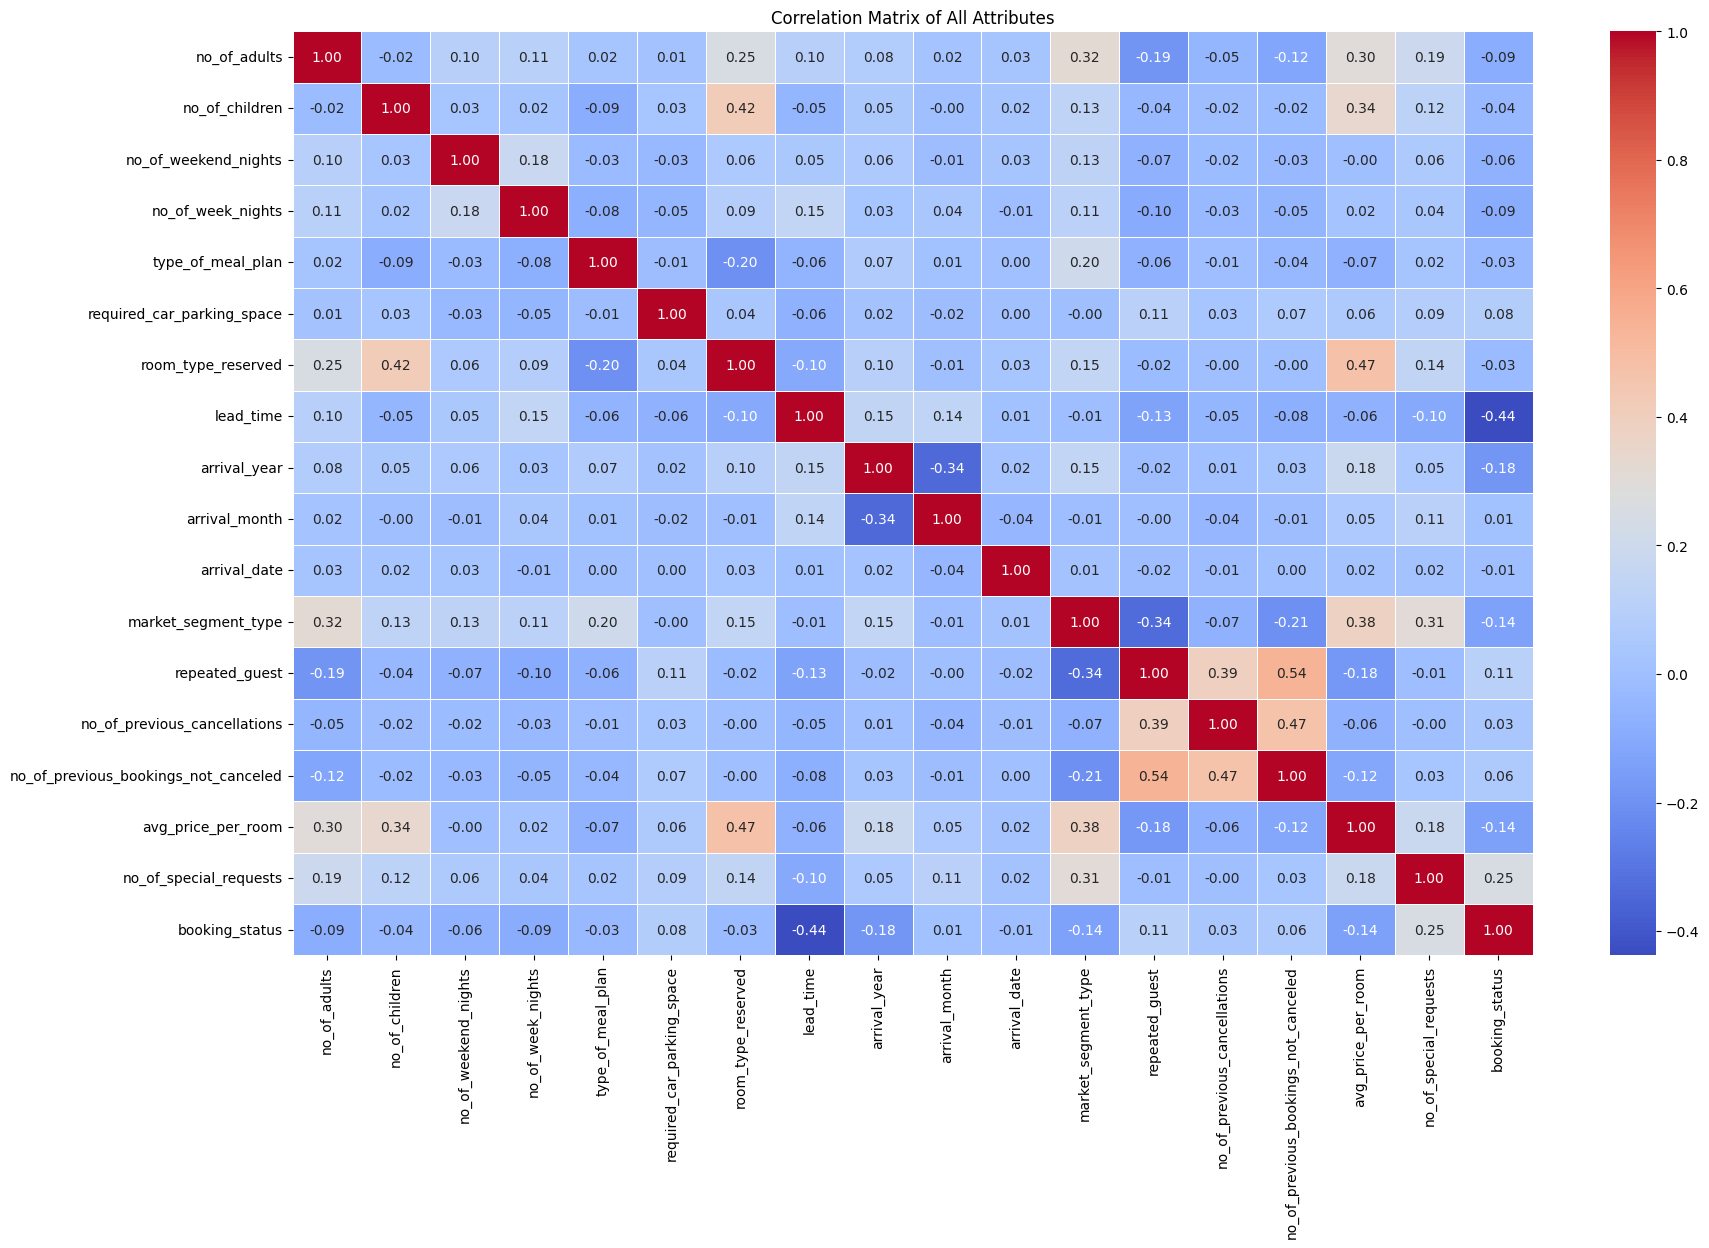

In [14]:
data_encoded = data.copy()

# Label encode categorical attributes
label_encoder = LabelEncoder()
for column in categorical_attributes:
    data_encoded[column] = label_encoder.fit_transform(data[column])

# Calculate correlation matrix
correlation_matrix = data_encoded.corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of All Attributes')
plt.show()

- By interpreting the above correlation matrix, we are able to analyse the relationships between the data attributes, and between the data attributes and the label.
- It can be found out that market_segment_type and no_of_previous_bookings_not_canceled possess the highest possible correlation of 0.54.
- With respect to the room_type_reserved label, 'avg_price_per_room' is found to have the most significant correlation of 0.47.

## Data Pre-processing & Feature Engineering
Discuss the steps you would take to clean and prepare the data for modeling. Justify why each step is necessary.

Analyze the relationship between all the features. Use appropriate visualization techniques.

Perform Feature Engineering on the dataset.

**Cleaning and preparing data for modeling is done through the following steps which would each be explained individually below:**

**1. Checking for null values**

In [15]:
# Find missing values
missing_values = data.isnull().sum()

# Display columns with missing values and their counts
print("Columns with missing values:")
print(missing_values)


Columns with missing values:
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64


- The first step involves identifying missing values in the dataset.
- The output shows the columns with missing values along with their respective counts.
- It was found out that the data contains no missing values.
- This step is necessary to ensure the completeness of data.

**2. Label Encoding categorical attributes (Feature Engineering)**

In [16]:
categorical_attributes = data.select_dtypes(include='object')

# Label encode categorical attributes
label_encoder = LabelEncoder()
for column in categorical_attributes:
    data[column] = label_encoder.fit_transform(data[column])

data.head(5)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1,0,2,1,0,0,0,116,2018,2,28,3,0,0,0,61.0,0,0
1,2,0,0,1,0,0,0,15,2018,12,27,3,0,0,0,65.0,0,1
2,1,0,2,2,0,0,3,44,2018,5,27,2,0,0,0,135.4,0,0
3,2,0,1,3,0,0,0,250,2018,9,26,4,0,0,0,95.0,0,0
4,3,0,2,3,0,0,2,48,2018,7,2,4,0,0,0,157.5,0,0


- The categorical attributes are identified and encoded using label encoding.
- This process converts categorical variables into numerical format, allowing machine learning algorithms to process them effectively.
- The encoded dataset is displayed to verify the transformation.



**3. Performing Statistical test - ANOVA (Feature Engineering)**

In [17]:
# Split the dataset into features and target variable
X = data.drop(columns=['room_type_reserved'])
y = data['room_type_reserved']

# Perform ANOVA
selector = SelectKBest(score_func=f_classif, k='all')
X_selected = selector.fit_transform(X, y)

# Get the p-values from ANOVA
p_values = selector.pvalues_

# Print the p-values for each feature
for i, column in enumerate(X.columns):
    print(f'Feature: {column}, p-value: {p_values[i]}')

Feature: no_of_adults, p-value: 0.0
Feature: no_of_children, p-value: 0.0
Feature: no_of_weekend_nights, p-value: 1.3927675682377512e-33
Feature: no_of_week_nights, p-value: 7.674022535814242e-85
Feature: type_of_meal_plan, p-value: 0.0
Feature: required_car_parking_space, p-value: 7.319339165495299e-16
Feature: lead_time, p-value: 1.4352046804540589e-86
Feature: arrival_year, p-value: 8.746973616746534e-91
Feature: arrival_month, p-value: 0.006774471167604239
Feature: arrival_date, p-value: 4.304653962422953e-08
Feature: market_segment_type, p-value: 0.0
Feature: repeated_guest, p-value: 1.4947609447130258e-32
Feature: no_of_previous_cancellations, p-value: 9.354266883744707e-11
Feature: no_of_previous_bookings_not_canceled, p-value: 7.513004101681046e-20
Feature: avg_price_per_room, p-value: 0.0
Feature: no_of_special_requests, p-value: 1.2795488054900601e-177
Feature: booking_status, p-value: 3.452543877399194e-12


- The dataset is split into features (X) and the target variable (y).
- ANOVA is performed to evaluate the statistical significance of each feature with respect to the target variable.
- The p-values for each feature are printed, indicating their level of significance in predicting the target variable (room_type_reserved).

**4. Eliminating columns based on ANOVA (Feature Engineering)**

In [18]:
# Drop features with high p-values
high_p_value_features = X.columns[p_values > 0.05]
X = X.drop(columns=high_p_value_features)

A common threshold for significance is a p-value less than 0.05. Thus, the features having p-values greater than 0.05 may not be significantly related to the target variable (room_type_reserved). Therefore, we can consider dropping these features from the dataset.

**5. Eliminating columns based on correlation (Feature Engineering)**

In [19]:
# Calculate correlations with Churn
correlations = data.corr()['room_type_reserved'].sort_values(ascending=False)

print("Correlations with room_type_reserved:")
print(correlations)

Correlations with room_type_reserved:
room_type_reserved                      1.000000
avg_price_per_room                      0.474144
no_of_children                          0.420660
no_of_adults                            0.251894
market_segment_type                     0.148847
no_of_special_requests                  0.140991
arrival_year                            0.099260
no_of_week_nights                       0.087746
no_of_weekend_nights                    0.055123
required_car_parking_space              0.042652
arrival_date                            0.032326
no_of_previous_bookings_not_canceled   -0.002774
no_of_previous_cancellations           -0.004262
arrival_month                          -0.005181
repeated_guest                         -0.019062
booking_status                         -0.027516
lead_time                              -0.104336
type_of_meal_plan                      -0.203280
Name: room_type_reserved, dtype: float64


- The correlations between each feature and the target variable (room_type_reserved) are calculated.
- Features with higher correlations are likely to have a stronger influence on churn prediction.
- The correlations are sorted in descending order to identify the most influential features.



In [20]:
low_correlation_features = correlations[abs(correlations) < 0.05].index
data = data.drop(columns=low_correlation_features)

print("Remaining features after feature elimination:")
print(data.columns)

Remaining features after feature elimination:
Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'room_type_reserved',
       'lead_time', 'arrival_year', 'market_segment_type',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')


- Features with low correlation coefficients (< 0.05 in absolute value) with the target variable are considered less impactful in predicting churn and thus features which can be dropped are:
 1. required_car_parking_space
 2. arrival_date
 3. no_of_previous_bookings_not_canceled
 4. no_of_previous_cancellations
 5. arrival_month
 6. repeated_guest
 7. booking_status

- These features are removed from the dataset to better fit the model and reduce overfitting.



**6. Splitting the Dataset**

In [21]:
X = data.drop(columns=['room_type_reserved'])

In [22]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the preprocessed data shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (26112, 10)
X_test shape: (6529, 10)
y_train shape: (26112,)
y_test shape: (6529,)


- Finally, the dataset is split into training and testing sets to train and evaluate the model, respectively.
- The shapes of the training and testing data are displayed to analyse the splitting process.

## Modeling

Train at least ***three*** different classifier models (e.g., SVM, Logistic Regression, KNN, etc.) and optimize hyperparameters to enhance performance. Implement a validation pipeline utilizing 5-fold cross-validation. For each classifier, report classification accuracy, precision, recall, and F1 score with both macro and weighted averages.

**Train at least three different classifier models (e.g., SVM, Logistic Regression, KNN, etc.) and optimize hyperparameters to enhance performance.**

In [25]:
# Define classifiers and their parameter grids
classifiers = {
    'Random Forest': (RandomForestClassifier(random_state=42),
                      {'n_estimators': [50, 100],
                       'max_depth': [None, 5],
                       'min_samples_split': [2, 5]}),

    'Decision Tree': (DecisionTreeClassifier(random_state=42),
                      {'max_depth': [None, 5],
                       'min_samples_split': [2, 5]}),

    'K-Nearest Neighbors': (KNeighborsClassifier(),
                             {'n_neighbors': [3, 5]})
}

- The above code defines three different classifier models: Random Forest, Decision Tree, and K-Nearest Neighbors.
- For each classifier, a set of hyperparameters is specified, and GridSearchCV is used to optimize these parameters for enhanced performance.


**Implement a validation pipeline utilizing 5-fold cross-validation. For each classifier, report classification accuracy, precision, recall, and F1 score with both macro and weighted averages.**

In [27]:
# Convert unique numeric values of the target variable to string labels
target_names = data['room_type_reserved'].unique().astype(str)

# Report classification metrics and best hyperparameters for each classifier
for name, (classifier, param_grid) in classifiers.items():
    print("Classifier:", name)

    # Perform GridSearchCV for hyperparameter optimization
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best estimator and its hyperparameters
    best_classifier = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Predict on test data using the best estimator
    y_pred = best_classifier.predict(X_test)

    # Print best hyperparameters
    print("Best hyperparameters:", best_params)

    # Print classification report
    print(classification_report(y_test, y_pred, target_names=target_names))
    print("="*80)

Classifier: Random Forest
Best hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5087
           3       0.86      0.49      0.63       126
           2       0.83      0.66      0.74      1056
           4       0.78      0.26      0.39        53
           1       0.87      0.86      0.86       179
           5       0.27      0.11      0.15        28

    accuracy                           0.90      6529
   macro avg       0.75      0.56      0.62      6529
weighted avg       0.89      0.90      0.89      6529

Classifier: Decision Tree
Best hyperparameters: {'max_depth': None, 'min_samples_split': 5}
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      5087
           3       0.53      0.55      0.54       126
           2       0.73      0.67      0.70      1056
           4       0.29      0.19  

The best parameters for each of the classifier include:

1.   **Random Forest**: 'max_depth': 'None', 'min_samples_split': 2, 'n_estimators': 100
2.   **Decision Tree**: 'max_depth': 'None', 'min_samples_split': 5
3.   **K-Nearest Neighbors:** 'n_neighbors': 3


- The above code defines a validation pipeline utilizing 5-fold cross-validation.
- It generates the classification report scores for each classifier using the best estimator obtained from GridSearchCV.
- It reports the evaluation metrics for each classifier, including classification accuracy, precision, recall, and F1 score with both macro and weighted averages.

**Findings:**

1. Random Forest and Decision Tree classifiers achieve higher accuracy compared to K-Nearest Neighbors on the test data, with Random Forest being the most accurate with 90% accuracy.

2. Class 0 (Room_Type 1) is predicted with high precision and recall by all classifiers, indicating their ability to effectively identify this majority class.

3. However, all classifiers struggle with predicting minority classes (classes 3, 4, and 5), as evidenced by lower precision and recall values for these classes.

4. Random Forest demonstrates the best overall performance among the three classifiers, achieving the highest accuracy and showing relatively better performance on minority classes compared to Decision Tree and K-Nearest Neighbors.

## Evaluation and Reporting

**Select a model that is expected to perform optimally on the unseen data and provide the predictions accordingly. Give clear conclusions.**

In [30]:
model = RandomForestClassifier(max_depth = None, min_samples_split = 2, n_estimators = 100, random_state = 42)

# Train the Random Forest classifier on the entire training dataset
model.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred = model.predict(X_test)

# Print the predictions
print("Predictions on unseen data:")
print(y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test data:", accuracy)

# Calculate and print F1 score (macro)
f1_macro = f1_score(y_test, y_pred, average='macro')
print("F1 Score (macro) on test data:", f1_macro)

Predictions on unseen data:
[0 0 0 ... 0 2 2]
Accuracy on test data: 0.9007504977791392
F1 Score (macro) on test data: 0.6193297958201901


- The Random Forest classifier, optimized with hyperparameters such as 'max_depth' set to None, 'min_samples_split' set to 2, and 'n_estimators' set to 100, gives the best performance on the unseen test dataset, attaining an accuracy of approximately 90% and a F1 Score of approximately 0.62.

- Given its high accuracy, we can confidently select Random Forest model to perform optimally on the unseen data and provide the predictions for room types effectively.

In [31]:
# Predict labels for the entire test set
y_pred_test = model.predict(X_test)

# Predict labels for the entire training set
y_pred_train = model.predict(X_train)

# Print predicted labels for test data along with actual labels
print("Predicted Labels vs. Actual Labels for Test Data:")
for i, (predicted_label, actual_label) in enumerate(zip(y_pred_test[:5], y_test[:5]), 1):
    print(f"Test Sample {i}: Predicted Label = {predicted_label}, Actual Label = {actual_label}")

# Print predicted labels for train data along with actual labels
print("\nPredicted Labels vs. Actual Labels for Train Data:")
for i, (predicted_label, actual_label) in enumerate(zip(y_pred_train[:5], y_train[:5]), 1):
    print(f"Train Sample {i}: Predicted Label = {predicted_label}, Actual Label = {actual_label}")

Predicted Labels vs. Actual Labels for Test Data:
Test Sample 1: Predicted Label = 0, Actual Label = 0
Test Sample 2: Predicted Label = 0, Actual Label = 0
Test Sample 3: Predicted Label = 0, Actual Label = 0
Test Sample 4: Predicted Label = 0, Actual Label = 0
Test Sample 5: Predicted Label = 0, Actual Label = 0

Predicted Labels vs. Actual Labels for Train Data:
Train Sample 1: Predicted Label = 0, Actual Label = 0
Train Sample 2: Predicted Label = 2, Actual Label = 2
Train Sample 3: Predicted Label = 0, Actual Label = 0
Train Sample 4: Predicted Label = 0, Actual Label = 0
Train Sample 5: Predicted Label = 0, Actual Label = 0


- The predicted labels for both the test and train datasets are compared with the actual labels.
- These results indicate that the model performs well on both the training and test datasets, and is effective in predicting the room types.